In [4]:
# Basic Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

# Preprocessing and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("profiles.csv")
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

# **Data Exploration**

## Age Distribution - Understanding Age brackets of users

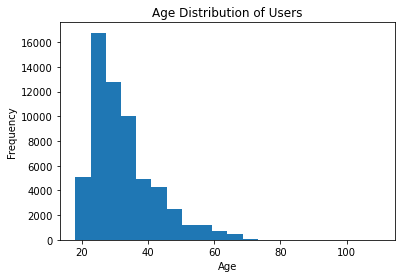

In [5]:
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Users")
plt.show()


Income vs. Essay Length: A scatter plot to see if there’s a visual correlation between income and essay length.

## Creating Essay Length Column and Avg Word Length Columns

In [9]:
# Combine all essay columns into a single text field for each user
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df['all_essays'] = df[essay_columns].fillna('').apply(lambda row: ' '.join(row), axis=1)

# Calculate essay length as total word count
df['essay_len'] = df['all_essays'].apply(lambda x: len(x.split()))

# Calculate average word length in each user's essays
df['avg_word_len'] = df['all_essays'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if x.split() else 0)

# Display the updated dataframe with the new columns
df[['essay_len', 'avg_word_len', 'income', 'job', 'status']].head()


,essay_len,avg_word_len,income,job,status
0,485,4.453608,-1,transportation,single
1,278,4.215827,80000,hospitality / travel,single
2,888,5.212838,-1,NaN,available
3,79,5.012658,20000,student,single
4,115,5.269565,-1,artistic / musical / writer,single


## Exploring Essay Length and Income relation

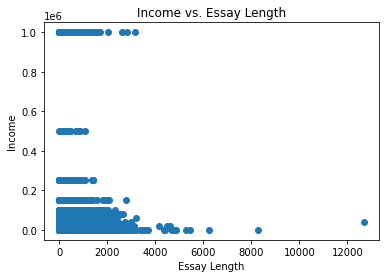

In [14]:
plt.scatter(df['essay_len'], df['income'])
plt.xlabel("Essay Length")
plt.ylabel("Income")
plt.title("Income vs. Essay Length")
plt.show()


## Exploring Avg Word Length and Income Relation

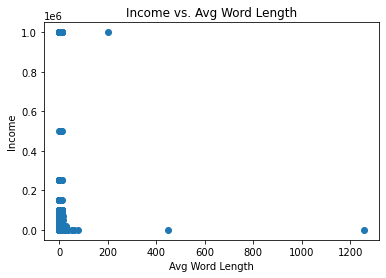

In [11]:
plt.scatter(df['avg_word_len'], df['income'])
plt.xlabel("Avg Word Length")
plt.ylabel("Income")
plt.title("Income vs. Avg Word Length")
plt.show()


## Regression Analysis

## Can a user’s income be predicted based on essay length and average word length?

Essay Length refers to all the answers the user has written to the prompt questions on their OKCupid profile

Null Hypothesis (H0): Essay length and average word length are not significant predictors of income.


Alternative Hypothesis (H1): Essay length and average word length are significant predictors of income.

### Using Linear Regresion

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df[['essay_len', 'avg_word_len']]
y = df['income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R² Score: {r2}")


Linear Regression Mean Squared Error: 9746602289.232325
Linear Regression R² Score: -0.009503140174760505


### Using K- Nearest Neighbour Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors R² Score: {r2_knn}")


K-Nearest Neighbors Mean Squared Error: 11628874477.515606
K-Nearest Neighbors R² Score: -0.20445925188917968


## Regression - Conclusion

Both Linear Regression and K-Nearest Neighbors Regression performed poorly in predicting income based on essay length and average word length. The Linear Regression model achieved a slightly lower MSE (9.7 billion) and higher R² score (-0.0095) than K-Nearest Neighbors (MSE of 11.6 billion, R² of -0.2045), though both scores were negative, indicating that neither model explained the variance in income effectively.

These results suggest that essay characteristics alone are insufficient predictors of income. Additional or alternative features, like education or job type, may be needed for better predictive accuracy.

Thus Null Hypothesis (H0) Essay length and average word length are not significant predictors of income is accepted

# Classification

## Can we classify users’ income level based on their education and body type?

In [23]:
from sklearn.preprocessing import LabelEncoder

# Filter data to include only relevant columns and drop rows with missing values
df_classification = df[['income', 'education', 'body_type']].dropna()

# Encode categorical variables
education_encoder = LabelEncoder()
body_type_encoder = LabelEncoder()

df_classification['education_code'] = education_encoder.fit_transform(df_classification['education'])
df_classification['body_type_code'] = body_type_encoder.fit_transform(df_classification['body_type'])

# Define income brackets (e.g., Low, Medium, High) based on income distribution
# Adjust these thresholds as needed
df_classification['income_bracket'] = pd.cut(df_classification['income'], bins=[-1, 20000, 60000, 100000, float('inf')],
                                             labels=['Low', 'Medium', 'High', 'Very High'])

# Encode income brackets as numerical labels
income_encoder = LabelEncoder()
df_classification['income_bracket_code'] = income_encoder.fit_transform(df_classification['income_bracket'])

# Define features and target variable
X = df_classification[['education_code', 'body_type_code']]
y = df_classification['income_bracket_code']


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [29]:
# Remove rows where income_bracket is "nan"
df_classification = df_classification[df_classification['income_bracket'] != 'nan']

# Encode income brackets again without the "nan" category
income_encoder = LabelEncoder()
df_classification['income_bracket_code'] = income_encoder.fit_transform(df_classification['income_bracket'])

# Define features and target variable without "nan" class
X = df_classification[['education_code', 'body_type_code']]
y = df_classification['income_bracket_code']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
target_names = [str(label) for label in income_encoder.classes_]

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=target_names, zero_division=0))


Logistic Regression Results:
Accuracy: 0.2101982423870836
              precision    recall  f1-score   support

        High       0.08      0.71      0.14       611
         Low       0.13      0.54      0.21       528
      Medium       0.10      0.06      0.07       683
   Very High       0.03      0.02      0.03       250
         nan       0.83      0.17      0.28      7714

    accuracy                           0.21      9786
   macro avg       0.23      0.30      0.15      9786
weighted avg       0.67      0.21      0.25      9786



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove rows where income_bracket is "nan"
df_classification = df_classification[df_classification['income_bracket'] != 'nan']

# Encode income brackets again without the "nan" category
income_encoder = LabelEncoder()
df_classification['income_bracket_code'] = income_encoder.fit_transform(df_classification['income_bracket'])

# Define features and target variable without "nan" class
X = df_classification[['education_code', 'body_type_code']]
y = df_classification['income_bracket_code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with balanced class weights
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test)
target_names = [str(label) for label in income_encoder.classes_]  # Ensure target names are strings

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=target_names, zero_division=0))


Random Forest Results:
Accuracy: 0.19946862865317802
              precision    recall  f1-score   support

        High       0.08      0.57      0.14       611
         Low       0.16      0.55      0.24       528
      Medium       0.12      0.16      0.14       683
   Very High       0.07      0.34      0.11       250
         nan       0.85      0.14      0.25      7714

    accuracy                           0.20      9786
   macro avg       0.25      0.35      0.18      9786
weighted avg       0.70      0.20      0.23      9786



### Classification - Conclusion

Based on the analysis, we explored whether users' income levels could be predicted using education and body type as features, using both Logistic Regression and Random Forest models. Here are the main findings and conclusions:

Key Findings
Low Predictive Accuracy: Both Logistic Regression and Random Forest achieved low accuracy scores (around 20%) for predicting income brackets. Precision, recall, and F1-scores were also low across all income categories, indicating that the models struggled to make meaningful predictions.

Class Imbalance: Despite efforts to balance classes, the "nan" category (likely representing missing or unspecified income data) dominated the predictions. This imbalance significantly affected the models’ ability to identify other income brackets.

Weak Correlation Between Features and Income: Education level and body type alone did not provide strong predictive power for income brackets, suggesting that additional or alternative features may be needed to capture meaningful patterns in income.

Conclusion
The analysis indicates that education level and body type alone are insufficient predictors of income for this dataset. The models struggled to distinguish between income brackets, likely due to limited predictive power in these features and the presence of significant class imbalance.

Recommendations
To improve predictive accuracy, future analyses could:

Incorporate additional features that may have a stronger correlation with income, such as job type, age, or location.
Remove missing values more rigorously to prevent the "nan" class from influencing model performance.
Experiment with feature engineering and sampling techniques to balance classes further.
In conclusion, while this analysis provided insights into the challenges of predicting income based on limited features, it also highlighted areas for improvement and further exploration.